<a href="https://colab.research.google.com/github/Bell2307/Estadistica/blob/main/ei_u4_02_23150299.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [56]:
import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

# Everardo Estrada De Lira

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('tiempo~ C(metodo)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
# Everardo Estrada De Lira

,df,sum_sq,mean_sq,F,PR(>F)
C(metodo),3.0,69.5,23.166667,9.423729,0.001771
Residual,12.0,29.5,2.458333,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


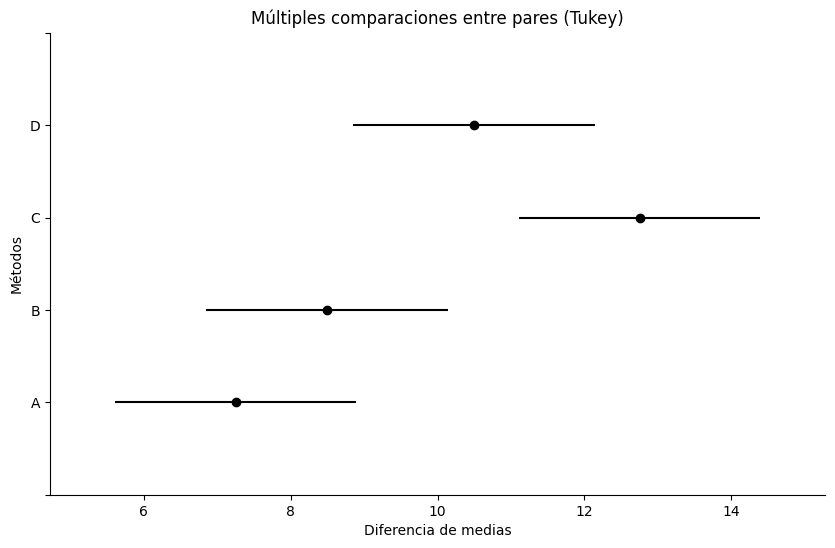

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey con tus datos
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Métodos", xlabel="Diferencia de medias")

plt.gca().spines['right'].set_visible(False)  # Borde derecho
plt.gca().spines['top'].set_visible(False)    # Borde superior
plt.title("Múltiples comparaciones entre pares (Tukey)")
plt.show()
# Everardo Estrada De Lira

In [12]:
niveles = {'A': 5, 'B': 10, 'C': 15,  'D':20}
df['metodol'] = df['metodo'].map(niveles)
df
# Everardo Estrada De Lira

,metodo,tiempo,metodol
0,A,6,5
1,A,8,5
2,A,7,5
3,A,8,5
4,B,7,10
5,B,9,10
6,B,10,10
7,B,8,10
8,C,11,15
9,C,16,15


In [14]:
from scipy.stats import shapiro

nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada método de ensamble
prueba_shapiro(df[df['metodo'] == 'A']['tiempo'], "Método A", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'B']['tiempo'], "Método B", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'C']['tiempo'], "Método C", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'D']['tiempo'], "Método D", nivel_de_significancia)
# Everardo Estrada De Lira


Prueba de Shapiro-Wilk para Método A:
Estadístico: 0.8634
Valor p: 0.2725
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Método B:
Estadístico: 0.9929
Valor p: 0.9719
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Método C:
Estadístico: 0.8481
Valor p: 0.2200
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Método D:
Estadístico: 0.9929
Valor p: 0.9719
Interpretación: Los datos tienen una distribución normal.


In [15]:
from scipy.stats import bartlett

nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['metodo'] == 'A']['tiempo'],
    df[df['metodo'] == 'B']['tiempo'],
    df[df['metodo'] == 'C']['tiempo'],
    df[df['metodo'] == 'D']['tiempo']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
# Everardo Estrada De Lira

Estadístico de Bartlett: 3.197177823007627
Valor p: 0.3622118535713045
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [16]:
import pandas as pd
from io import StringIO

datos = '''
TipoDeCuero,Observacion,Promedio
A,264,256.7
A,260,256.7
A,258,256.7
A,241,256.7
A,262,256.7
A,255,256.7
B,208,209.8
B,220,209.8
B,216,209.8
B,200,209.8
B,213,209.8
B,206,209.8
C,220,230.8
C,263,230.8
C,219,230.8
C,225,230.8
C,230,230.8
C,228,230.8
D,217,220.7
D,226,220.7
D,215,220.7
D,227,220.7
D,220,220.7
D,222,220.7
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# Everardo Estrada De Lira

,TipoDeCuero,Observacion,Promedio
0,A,264,256.7
1,A,260,256.7
2,A,258,256.7
3,A,241,256.7
4,A,262,256.7
5,A,255,256.7
6,B,208,209.8
7,B,220,209.8
8,B,216,209.8
9,B,200,209.8


In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Observacion~ C(TipoDeCuero)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
# Everardo Estrada De Lira

,df,sum_sq,mean_sq,F,PR(>F)
C(TipoDeCuero),3.0,7019.458333,2339.819444,22.755356,0.000001
Residual,20.0,2056.500000,102.825000,NaN,NaN


Text(0.5, 1.0, '')

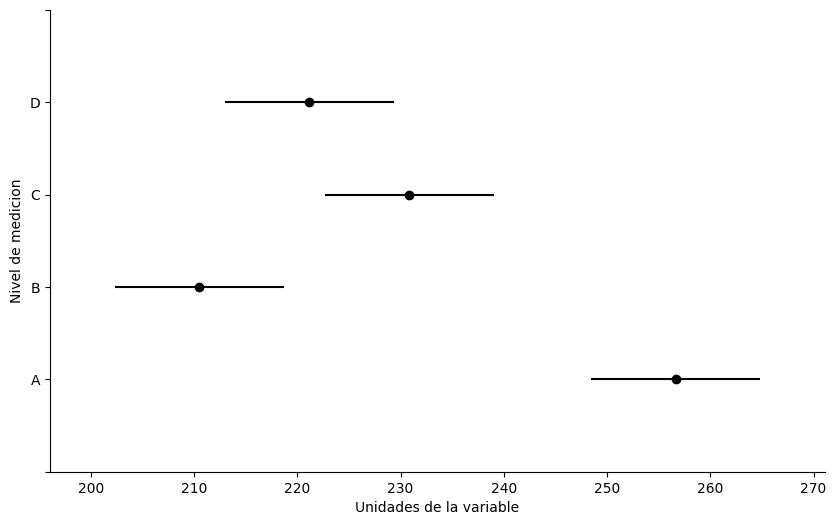

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Observacion'], groups = df['TipoDeCuero'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
# Everardo Estrada De Lira

In [19]:
niveles = {'A': 100, 'B': 150, 'C': 200,  'D':300}
df['TipoDeCuerol'] = df['TipoDeCuero'].map(niveles)
df
# Everardo Estrada De Lira

,TipoDeCuero,Observacion,Promedio,TipoDeCuerol
0,A,264,256.7,100
1,A,260,256.7,100
2,A,258,256.7,100
3,A,241,256.7,100
4,A,262,256.7,100
5,A,255,256.7,100
6,B,208,209.8,150
7,B,220,209.8,150
8,B,216,209.8,150
9,B,200,209.8,150


In [23]:
from scipy.stats import shapiro

nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada tipo de cuero (grupos A, B, C, D)
prueba_shapiro(df[df['TipoDeCuero'] == 'A']['Observacion'], "Tipo A", nivel_de_significancia)
prueba_shapiro(df[df['TipoDeCuero'] == 'B']['Observacion'], "Tipo B", nivel_de_significancia)
prueba_shapiro(df[df['TipoDeCuero'] == 'C']['Observacion'], "Tipo C", nivel_de_significancia)
prueba_shapiro(df[df['TipoDeCuero'] == 'D']['Observacion'], "Tipo D", nivel_de_significancia)
# Everardo Estrada De Lira


Prueba de Shapiro-Wilk para Tipo A:
Estadístico: 0.8348
Valor p: 0.1180
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Tipo B:
Estadístico: 0.9847
Valor p: 0.9723
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Tipo C:
Estadístico: 0.7369
Valor p: 0.0148
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Tipo D:
Estadístico: 0.9453
Valor p: 0.7017
Interpretación: Los datos tienen una distribución normal.


In [24]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['TipoDeCuero'] == 'A']['Observacion'],
    df[df['TipoDeCuero'] == 'B']['Observacion'],
    df[df['TipoDeCuero'] == 'C']['Observacion']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    # Everardo Estrada De Lira

Estadístico de Bartlett: 6.0025912223536055
Valor p: 0.049722605454079416
Rechazamos la hipótesis nula: Las varianzas no son iguales.


3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [25]:
import pandas as pd
from io import StringIO

datos = '''
Tratamiento,Valor
T1,213
T1,214
T1,204
T1,208
T1,212
T1,200
T1,207
T2,76
T2,85
T2,74
T2,78
T2,82
T2,75
T2,82
T3,57
T3,67
T3,55
T3,64
T3,61
T3,63
T3,63
T4,84
T4,82
T4,85
T4,92
T4,87
T4,79
T4,90
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# Everardo Estrada De Lira

,Tratamiento,Valor
0,T1,213
1,T1,214
2,T1,204
3,T1,208
4,T1,212
5,T1,200
6,T1,207
7,T2,76
8,T2,85
9,T2,74


In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Valor~ C(Tratamiento )', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
# Everardo Estrada De Lira

,df,sum_sq,mean_sq,F,PR(>F)
C(Tratamiento),3.0,95041.250000,31680.416667,1558.966022,1.260640e-27
Residual,24.0,487.714286,20.321429,NaN,NaN


Text(0.5, 1.0, '')

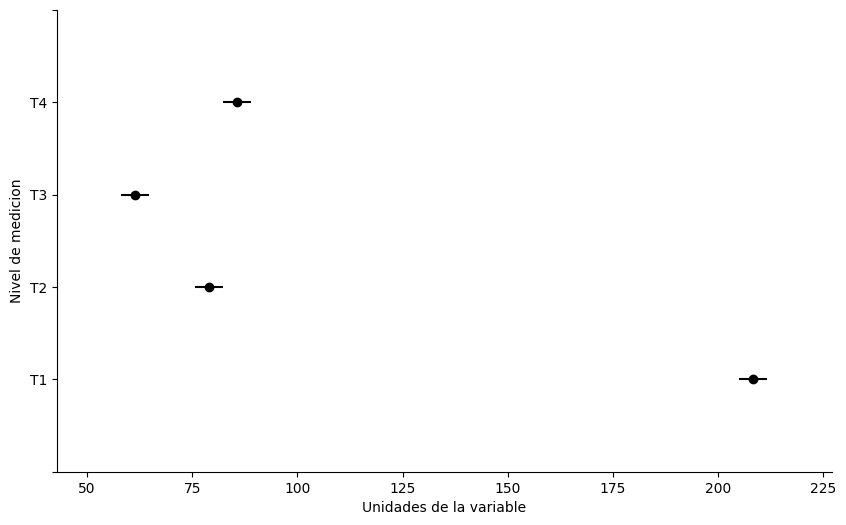

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Valor'], groups = df['Tratamiento'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
# Everardo Estrada De Lira

4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


In [29]:
import pandas as pd
from io import StringIO

datos = '''
Temperatura,Valor
20°C,15
20°C,18
20°C,13
20°C,12
40°C,17
40°C,21
40°C,11
40°C,16
60°C,23
60°C,19
60°C,25
60°C,22
80°C,28
80°C,32
80°C,34
80°C,31
100°C,45
100°C,51
100°C,57
100°C,48
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# Everardo Estrada De Lira

,Temperatura,Valor
0,20°C,15
1,20°C,18
2,20°C,13
3,20°C,12
4,40°C,17
5,40°C,21
6,40°C,11
7,40°C,16
8,60°C,23
9,60°C,19


In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Valor ~C(Temperatura)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
# Everardo Estrada De Lira

,df,sum_sq,mean_sq,F,PR(>F)
C(Temperatura),4.0,3411.8,852.950000,68.054521,1.963480e-09
Residual,15.0,188.0,12.533333,NaN,NaN


Text(0.5, 1.0, '')

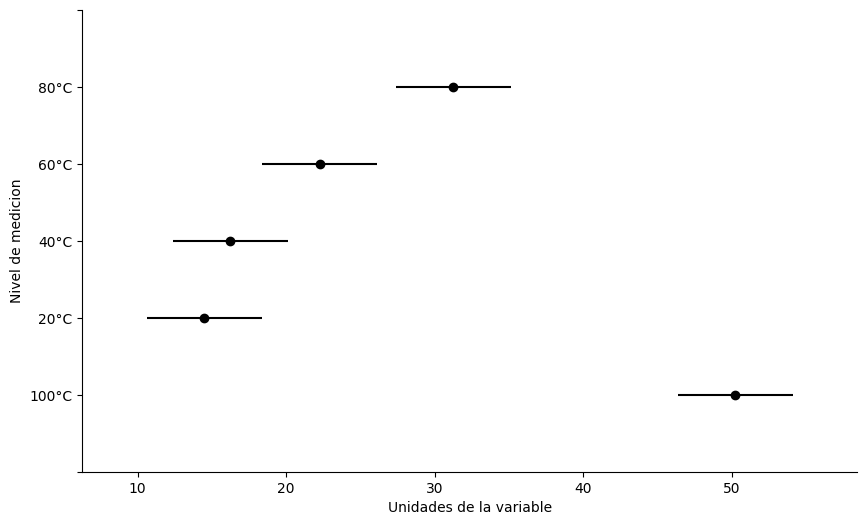

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Valor'], groups = df['Temperatura'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
# Everardo Estrada De Lira

5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


In [34]:
import pandas as pd
df = pd.read_csv ("https://raw.githubusercontent.com/Bell2307/Estadistica/refs/heads/main/problema%205.csv")
df.dropna(inplace = True)
df
# Everardo Estrada De Lira

,Tratamiento,PorcentajeDefectuoso
0,Con tratamiento,5.3
1,Con tratamiento,4.0
2,Con tratamiento,4.0
3,Con tratamiento,4.0
4,Con tratamiento,2.6
5,Con tratamiento,2.1
6,Con tratamiento,5.1
7,Con tratamiento,4.1
8,Con tratamiento,4.1
9,Con tratamiento,3.2


In [35]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('PorcentajeDefectuoso~ C(Tratamiento)', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova
# Everardo Estrada De Lira

,df,sum_sq,mean_sq,F,PR(>F)
C(Tratamiento),1.0,269.449615,269.449615,37.102806,0.000003
Residual,24.0,174.293846,7.262244,NaN,NaN


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1          group2     meandiff p-adj lower  upper reject
------------------------------------------------------------------
Con tratamiento Sin tratamiento   6.4385   0.0 4.2569  8.62   True
------------------------------------------------------------------


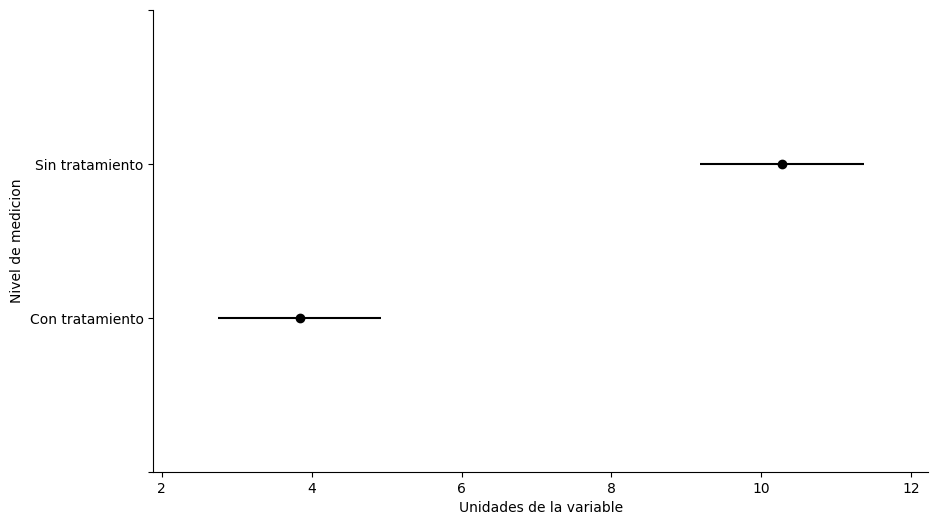

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['PorcentajeDefectuoso'], groups = df['Tratamiento'], alpha = nivel_de_significancia)
tukey.plot_simultaneous(ylabel = 'Nivel de medicion', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)
# Everardo Estrada De Lira

In [37]:
niveles = {'Con tratamiento': 0, 'Sin tratamiento': 15}
df['Tratamiento'] = df['Tratamiento'].map(niveles)
df
# Everardo Estrada De Lira

,Tratamiento,PorcentajeDefectuoso
0,0,5.3
1,0,4.0
2,0,4.0
3,0,4.0
4,0,2.6
5,0,2.1
6,0,5.1
7,0,4.1
8,0,4.1
9,0,3.2


6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


In [43]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from io import StringIO

# Datos
datos = '''
Almidon,Dureza
2,4.3
2,5.2
2,4.8
2,4.5
5,6.5
5,7.3
5,6.9
5,6.1
10,9.0
10,7.8
10,8.5
10,8.1
'''
df = pd.read_csv(StringIO(datos))

# ANOVA
modelo = smf.ols('Dureza ~ C(Almidon)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)

# Mostrar resultados
print(tabla_anova)
# Everardo Estrada De Lira

             df     sum_sq    mean_sq          F    PR(>F)
C(Almidon)  2.0  26.726667  13.363333  58.101449  0.000007
Residual    9.0   2.070000   0.230000        NaN       NaN


7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


In [49]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from io import StringIO

# Datos en formato CSV
datos = '''
NivelesDeNitrogeno,Rendimientos(ton/ha)
1,14.823
1,14.676
1,14.72
1,14.5141
1,15.065
2,25.151
2,25.401
2,25.131
2,25.031
2,25.267
3,32.605
3,32.46
3,32.256
3,32.669
3,32.111
'''

# Crear DataFrame
df = pd.read_csv(StringIO(datos))
# Everardo Estrada De Lira

8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


In [57]:
import pandas as pd
from io import StringIO

datos = '''
Aglutinante,Porcentajedefriabilidad
PVP,0.485
PVP,0.250
PVP,0.073
PVP,0.205
PVP,0.161
CMC,9.64
CMC,9.37
CMC,9.53
CMC,9.86
CMC,9.79
Gre,0.289
Gre,0.275
Gre,0.612
Gre,0.152
Gre,0.137
'''
df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df
# Everardo Estrada De Lira

,Aglutinante,Porcentajedefriabilidad
0,PVP,0.485
1,PVP,0.250
2,PVP,0.073
3,PVP,0.205
4,PVP,0.161
5,CMC,9.640
6,CMC,9.370
7,CMC,9.530
8,CMC,9.860
9,CMC,9.790


In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
modelo = smf.ols('Porcentajedefriabilidad ~ C(Aglutinante)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
print(tabla_anova)
# Everardo Estrada De Lira

                  df      sum_sq     mean_sq            F        PR(>F)
C(Aglutinante)   2.0  292.920971  146.460485  4420.972597  6.198213e-18
Residual        12.0    0.397543    0.033129          NaN           NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   CMC    Gre   -9.345   0.0 -9.6521 -9.0379   True
   CMC    PVP  -9.4032   0.0 -9.7103 -9.0961   True
   Gre    PVP  -0.0582  0.87 -0.3653  0.2489  False
---------------------------------------------------


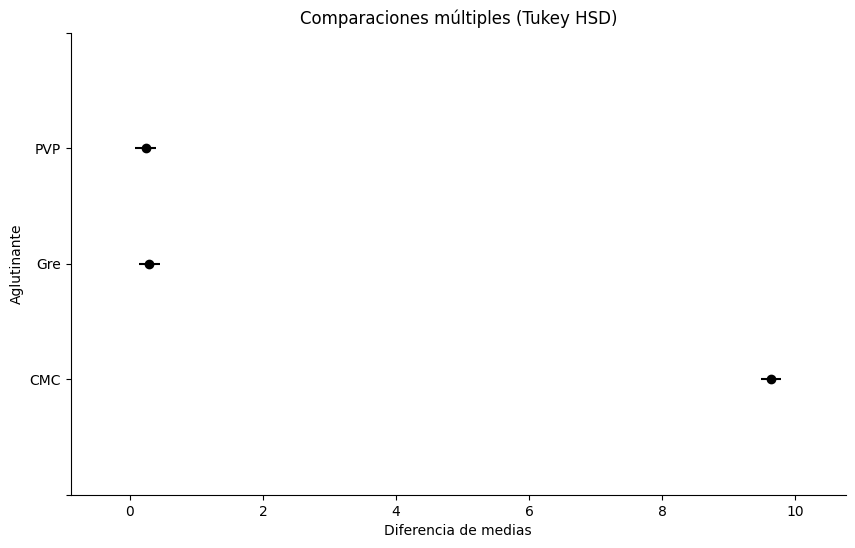

In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey con los datos ajustados
tukey = pairwise_tukeyhsd(endog=df['Porcentajedefriabilidad'], groups=df['Aglutinante'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de diferencias entre grupos
tukey.plot_simultaneous(ylabel="Aglutinante", xlabel="Diferencia de medias")

plt.gca().spines['right'].set_visible(False)  # Quitar borde derecho
plt.gca().spines['top'].set_visible(False)    # Quitar borde superior
plt.title("Comparaciones múltiples (Tukey HSD)")
plt.show()
# Everardo Estrada De Lira

9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


In [67]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from io import StringIO

datos = '''
Clona,Porcentaje de azúcares reductores totales
1,8.69
1,6.68
1,6.83
1,6.43
1,10.30
2,8.00
2,16.41
2,12.43
2,10.99
2,15.53
3,17.39
3,13.73
3,15.62
3,17.05
3,15.42
4,10.37
4,9.16
4,8.83
4,4.40
4,10.38
'''

# Cargar datos
df = pd.read_csv(StringIO(datos))

# Renombrar columna para que sea fácil usar en fórmulas
df.rename(columns={'Porcentaje de azúcares reductores totales': 'Porcentaje_azucares'}, inplace=True)

# Ajustar modelo ANOVA
modelo = smf.ols('Porcentaje_azucares ~ C(Clona)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)

print(tabla_anova)
# Everardo Estrada De Lira

            df     sum_sq    mean_sq          F    PR(>F)
C(Clona)   3.0  209.90716  69.969053  12.327073  0.000198
Residual  16.0   90.81676   5.676048        NaN       NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    4.886 0.0237   0.575  9.197   True
     1      3    8.056 0.0003   3.745 12.367   True
     1      4    0.842 0.9428  -3.469  5.153  False
     2      3     3.17 0.1939  -1.141  7.481  False
     2      4   -4.044 0.0699  -8.355  0.267  False
     3      4   -7.214  0.001 -11.525 -2.903   True
---------------------------------------------------


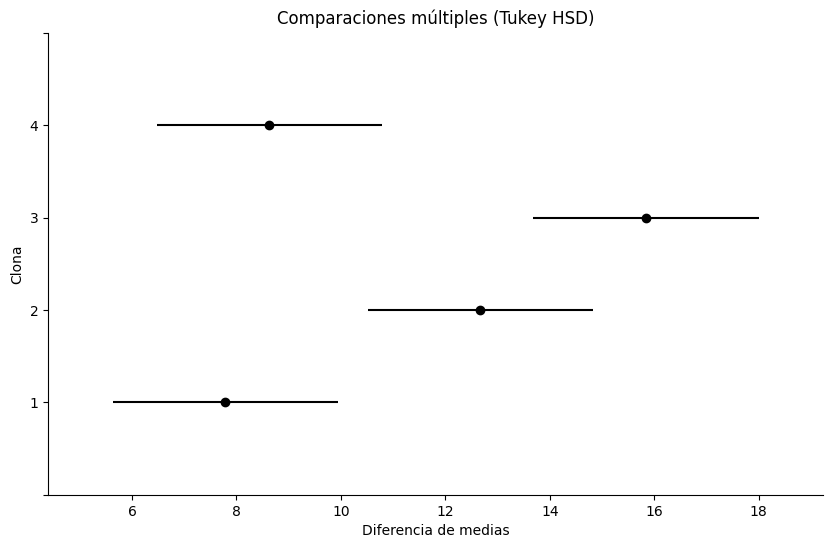

In [68]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey con los datos de porcentaje de azúcares y grupos Clona
tukey = pairwise_tukeyhsd(endog=df['Porcentaje_azucares'], groups=df['Clona'], alpha=nivel_de_significancia)

# Mostrar resultados
print(tukey)

# Gráfico de comparaciones múltiples
tukey.plot_simultaneous(ylabel="Clona", xlabel="Diferencia de medias")

plt.gca().spines['right'].set_visible(False)  # Quitar borde derecho
plt.gca().spines['top'].set_visible(False)    # Quitar borde superior
plt.title("Comparaciones múltiples (Tukey HSD)")
plt.show()
# Everardo Estrada De Lira

10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


In [74]:
import pandas as pd
from io import StringIO

datos = '''
Con tratamiento,Sin tratamiento
5.30,8.02
4.03,13.18
4.00,7.15
2.56,9.11
5.06,8.23
4.06,16.3
2.08,9.20
4.03,6.35
2.04,7.15
1.18,8.66
'''

df = pd.read_csv(StringIO(datos))
print(df)
# Everardo Estrada De Lira

   Con tratamiento  Sin tratamiento
0             5.30             8.02
1             4.03            13.18
2             4.00             7.15
3             2.56             9.11
4             5.06             8.23
5             4.06            16.30
6             2.08             9.20
7             4.03             6.35
8             2.04             7.15
9             1.18             8.66


In [75]:
df_long = df.melt(var_name='Aglutinante', value_name='Porcentajedefriabilidad')
print(df_long)
# Everardo Estrada De Lira

        Aglutinante  Porcentajedefriabilidad
0   Con tratamiento                     5.30
1   Con tratamiento                     4.03
2   Con tratamiento                     4.00
3   Con tratamiento                     2.56
4   Con tratamiento                     5.06
5   Con tratamiento                     4.06
6   Con tratamiento                     2.08
7   Con tratamiento                     4.03
8   Con tratamiento                     2.04
9   Con tratamiento                     1.18
10  Sin tratamiento                     8.02
11  Sin tratamiento                    13.18
12  Sin tratamiento                     7.15
13  Sin tratamiento                     9.11
14  Sin tratamiento                     8.23
15  Sin tratamiento                    16.30
16  Sin tratamiento                     9.20
17  Sin tratamiento                     6.35
18  Sin tratamiento                     7.15
19  Sin tratamiento                     8.66


In [76]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Porcentajedefriabilidad ~ C(Aglutinante)', data=df_long).fit()
tabla_anova = sm.stats.anova_lm(modelo)
print(tabla_anova)
# Everardo Estrada De Lira

                  df      sum_sq     mean_sq          F   PR(>F)
C(Aglutinante)   1.0  174.109005  174.109005  30.605669  0.00003
Residual        18.0  102.398090    5.688783        NaN      NaN


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1          group2     meandiff p-adj lower upper reject
-----------------------------------------------------------------
Con tratamiento Sin tratamiento    5.901   0.0  3.66 8.142   True
-----------------------------------------------------------------


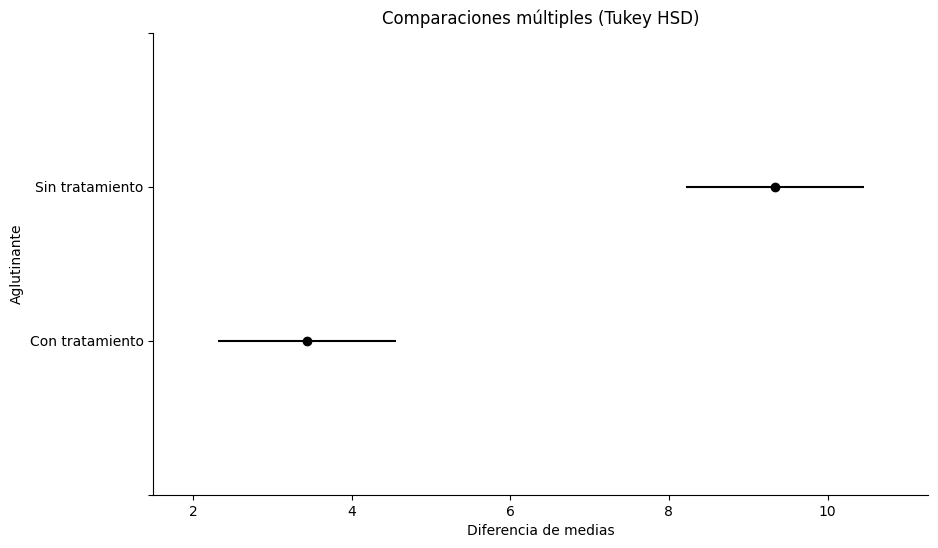

In [77]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey con los datos de porcentaje de friabilidad y grupos Aglutinante
tukey = pairwise_tukeyhsd(endog=df_long['Porcentajedefriabilidad'], groups=df_long['Aglutinante'], alpha=nivel_de_significancia)

# Mostrar resultados
print(tukey)

# Gráfico de comparaciones múltiples
tukey.plot_simultaneous(ylabel="Aglutinante", xlabel="Diferencia de medias")

plt.gca().spines['right'].set_visible(False)  # Quitar borde derecho
plt.gca().spines['top'].set_visible(False)    # Quitar borde superior
plt.title("Comparaciones múltiples (Tukey HSD)")
plt.show()
# Everardo Estrada De Lira